In [6]:
import os
import json
import math

import sys
sys.path.append("../utils")
from minimal_image import get_compact

from skimage.io import MultiImage

import matplotlib.pyplot as plt

import numpy as np

In [7]:
data_dir = "../input/prostate-cancer-grade-assessment/train_images/"

In [8]:
with open("../input/compact_representation.json", "r") as file:
    compact_representation = json.load(file)

In [9]:
max_h = 0
max_w = 0
max_area = 0

name_h = ""
name_w = ""
name_a = ""

for key, item in compact_representation.items():
    boxes = item["rectangles"]
    res_shape = [0, 0]
    for _, (w, h), _ in boxes:
        if h > w:
            h, w = w, h
        res_shape[0] += h
        res_shape[1] = max(res_shape[1], w)
    h, w = res_shape
    a = w * h
    if max_area < a:
        max_area = a
        name_a = key
    if max_w < w:
        max_w = w
        name_w = key
    if max_h < h:
        max_h = h
        name_h = key

max_w = math.ceil(max_w)
max_h = math.ceil(max_h)
max_area = math.ceil(max_area)

In [10]:
max_w, max_h, max_area

(3532, 2055, 4657378)

In [11]:
img_h = MultiImage(os.path.join(data_dir, name_h))
img_w = MultiImage(os.path.join(data_dir,name_w))
img_a = MultiImage(os.path.join(data_dir,name_a))

In [93]:
def show1(img_name, index=-1):
    img_m = MultiImage(os.path.join(data_dir, img_name))
    
    plt.figure()
    plt.subplot(121)
    plt.title(f"{img_m[-1].shape}, area={np.prod(img_m[index].shape[:2])}")
    plt.imshow(img_m[-1])

    img = get_compact(img_m[index], compact_representation[img_name])
    plt.subplot(122)
    plt.title(f"{img.shape}, area={np.prod(img.shape[:2])}")
    plt.imshow(img)

In [94]:
def tile(img, sz=128, N=16):
    shape = img.shape
    pad0,pad1 = (sz - shape[0]%sz)%sz, (sz - shape[1]%sz)%sz
    
    img = np.pad(img,[[pad0//2,pad0-pad0//2],[pad1//2,pad1-pad1//2],[0,0]],
                constant_values=255)
    
    h, w = img.shape[:2]
    
    img = img.reshape(img.shape[0]//sz,sz,img.shape[1]//sz,sz,3)
    img = img.transpose(0,2,1,3,4).reshape(-1,sz,sz,3)
    
    if len(img) < N:
        img = np.pad(img,[[0,N-len(img)],[0,0],[0,0],[0,0]],constant_values=255)

    idxs = np.argsort(img.reshape(img.shape[0],-1).sum(-1))[:N]
    
    img = img[idxs]
    s = int(np.sqrt(N))
    result = np.empty([sz * s, sz * s, 3], dtype=np.uint8)
    for i in range(len(img)):
        x = i % s
        y = i // s
        result[y * sz:(y + 1) * sz, x * sz:(x + 1) * sz] = img[i]
    
    return result

In [95]:
def show2(img_name, sz=128, N=16, index=-1):
    img_m = MultiImage(os.path.join(data_dir, img_name))
    
    plt.figure()
    plt.subplot(121)
    plt.imshow(tile(img_m[index], sz, N))

    img = get_compact(img_m[index], compact_representation[img_name])
    plt.subplot(122)
    plt.imshow(tile(img, sz, N))

In [100]:
def show(name, sz=128, N=16, index=-1):
    show1(name, index=index)
    show2(name, sz, N, index=index)

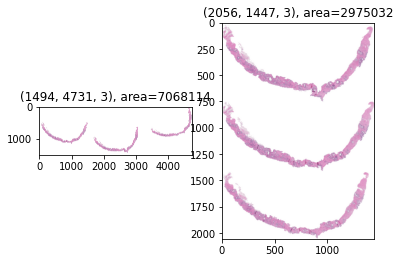

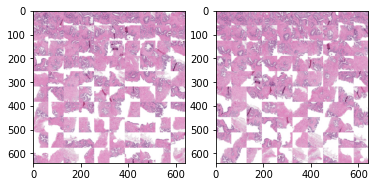

In [109]:
show(name_h, 64, 100)

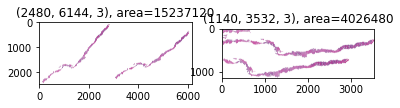

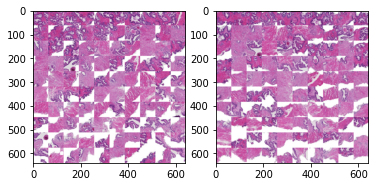

In [108]:
show(name_w, 64, 100)

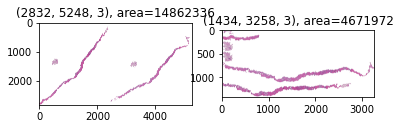

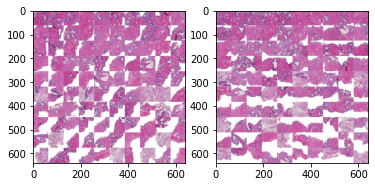

In [107]:
show(name_a, 64, 100)

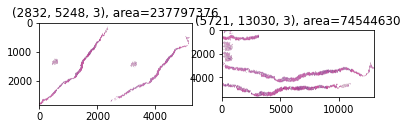

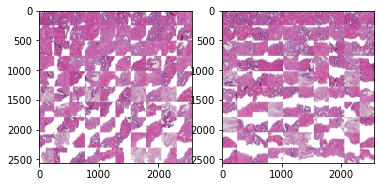

In [117]:
show(name_a, 256, 100, 1)

In [118]:
import pandas as pd

In [119]:
df = pd.read_csv("/home/dipet/kaggle/prostate/input/prostate-cancer-grade-assessment/train.csv")
df.head()

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [121]:
df.groupby("isup_grade").count()

,image_id,data_provider,gleason_score
isup_grade,,,
0,2892,2892,2892
1,2666,2666,2666
2,1343,1343,1343
3,1242,1242,1242
4,1249,1249,1249
5,1224,1224,1224
